<a href="https://www.kaggle.com/code/gopika19/sentiment-analysis-using-naiveb-randfor-logreg?scriptVersionId=109758092" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt



import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')


from collections import Counter

from matplotlib import pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv


In [2]:
#load the data 
alexa_reviews_df =pd.read_csv("/kaggle/input/amazon-alexa-reviews/amazon_alexa.tsv",sep='\t') 

In [3]:
alexa_reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
#droping unwanted column
alexa_reviews_df.drop(['date'],axis=1,inplace = True)
alexa_reviews_df.drop(['variation'],axis=1,inplace = True)


In [5]:
alexa_reviews_df.head()

,rating,verified_reviews,feedback
0,5,Love my Echo!,1
1,5,Loved it!,1
2,4,"Sometimes while playing a game, you can answer...",1
3,5,I have had a lot of fun with this thing. My 4 ...,1
4,5,Music,1


In [6]:
alexa_reviews_df.isnull().sum().sum()

0

In [7]:
alexa_reviews_df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='rating', ylabel='count'>

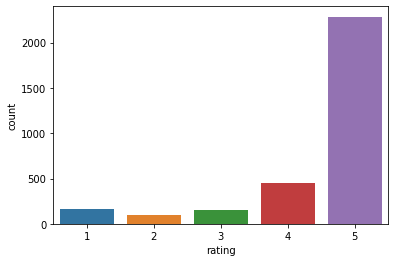

In [8]:
sns.countplot(alexa_reviews_df['rating'], label ='count')

In [9]:
# length of the reviews
alexa_reviews_df['length'] = alexa_reviews_df['verified_reviews'].apply(len)


In [10]:
alexa_reviews_df

,rating,verified_reviews,feedback,length
0,5,Love my Echo!,1,13
1,5,Loved it!,1,9
2,4,"Sometimes while playing a game, you can answer...",1,195
3,5,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Music,1,5
...,...,...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,"Listening to music, searching locations, check...",1,135
3147,5,"I do love these things, i have them running my...",1,441
3148,5,Only complaint I have is that the sound qualit...,1,380


In [11]:
alexa_reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


In [12]:
#taking out the reviews
reviews = alexa_reviews_df['verified_reviews']
reviews

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

In [13]:
#converting all review text to lowercase
to_lower = lambda x: x.lower()
reviews_lc = reviews.apply(to_lower)
reviews_lc

0                                           love my echo!
1                                               loved it!
2       sometimes while playing a game, you can answer...
3       i have had a lot of fun with this thing. my 4 ...
4                                                   music
                              ...                        
3145    perfect for kids, adults and everyone in betwe...
3146    listening to music, searching locations, check...
3147    i do love these things, i have them running my...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [14]:
#removing punctuation
remove_puncs = lambda x: x.translate(str.maketrans("","",string.punctuation))
reviews_lc_np= reviews_lc.apply(remove_puncs)
reviews_lc_np

0                                            love my echo
1                                                loved it
2       sometimes while playing a game you can answer ...
3       i have had a lot of fun with this thing my 4 y...
4                                                   music
                              ...                        
3145      perfect for kids adults and everyone in between
3146    listening to music searching locations checkin...
3147    i do love these things i have them running my ...
3148    only complaint i have is that the sound qualit...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

In [15]:
#removing stopwords
stop_words = set(stopwords.words())
remove_words = lambda x:''.join([word for word in x.split() if word not in stop_words])
reviews_lc_np_ns = reviews_lc_np.apply(remove_words)
reviews_lc_np_ns

0                                                loveecho
1                                                   loved
2       playinggameanswerquestioncorrectlyalexawrongan...
3       lotfun4yrlearnsdinosaurscontrollightsplaygames...
4                                                   music
                              ...                        
3145                                    perfectkidsadults
3146    listeningmusicsearchinglocationscheckingtimewe...
3147    lovethingsrunningentirehometvlightsthermostatf...
3148    complaintsoundqualitygreatcommandsdothookedste...
3149                                                     
Name: verified_reviews, Length: 3150, dtype: object

In [16]:
words_list = [word for line in reviews_lc_np_ns for word in line.split()]
words_list[:10]

['loveecho',
 'loved',
 'playinggameanswerquestioncorrectlyalexawronganswersturnlightsawayhome',
 'lotfun4yrlearnsdinosaurscontrollightsplaygamescategoriesnicesoundplayingmusic',
 'music',
 'receivedechogiftneededbluetoothplaymusiceasilyaccessiblefoundsmartspeakercan’twait',
 'cellphonefeaturesipadgreatalarmrdeafhearalarmbedroomlivingroomreasonheritfunrandomquestionshearresponsesmartbonpolitics',
 '5thivepurchasedworkingroomhousefeaturesofferspecifilyplayingmusicechoscontrollinglightshouse',
 'great',
 'lovei’velistenedsongshaven’theardchildhoodnewsweatherinformationit’sgreat']

In [17]:
word_counts = Counter(words_list).most_common(50)
words_df = pd.DataFrame(word_counts)
words_df.columns =['word','frq']
words_df.head()

,word,frq
0,love,100
1,worksgreat,23
2,greatproduct,19
3,easyset,18
4,great,16


In [18]:
df_text = reviews_lc_np_ns
df_text.head()

0                                             loveecho
1                                                loved
2    playinggameanswerquestioncorrectlyalexawrongan...
3    lotfun4yrlearnsdinosaurscontrollightsplaygames...
4                                                music
Name: verified_reviews, dtype: object

**Word cloud**

In [19]:
#joining all the review to form a junk of sentence to find the most common words
sentence = alexa_reviews_df['verified_reviews'].tolist()
len(sentence)

3150

In [20]:
sentence_as_one_string = " ".join(sentence)


In [21]:
from wordcloud import WordCloud

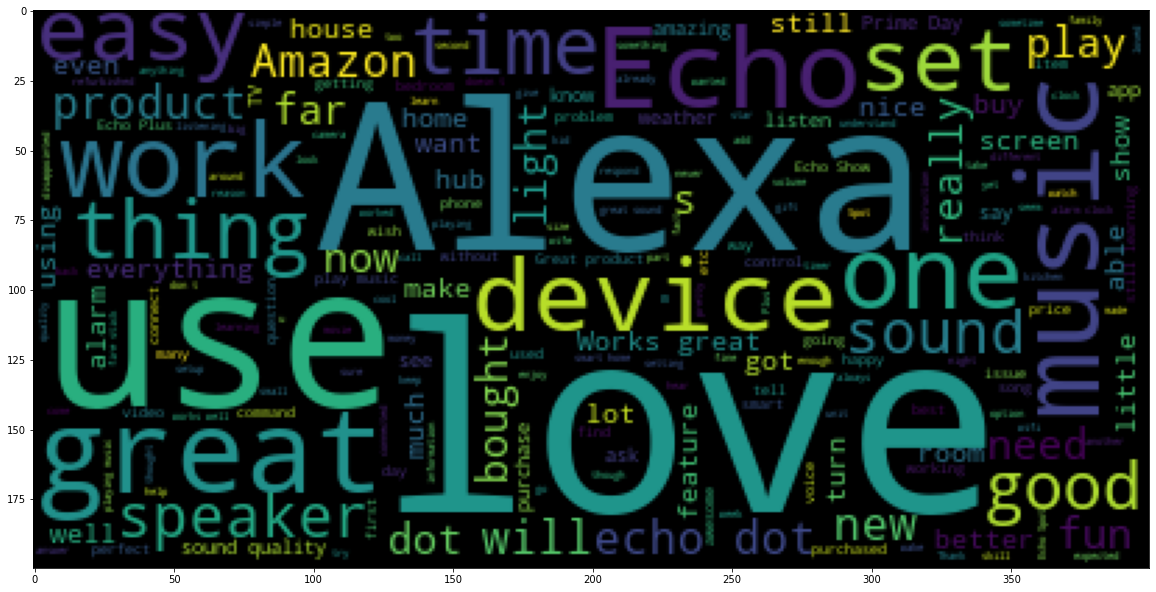

In [22]:
plt.figure(figsize =(20,20))
plt.imshow(WordCloud().generate(sentence_as_one_string))

# Function defines a pipeline to clean up all the message 
**1.remove punctuation
2.remove stopword**

In [23]:
# def message_cleaning(message):
#     Test_punc_removed = [char for char in message if char not in string.punctuation]
#     Test_punc_removed_join = "".join(Test_punc_removed)
#     Test_punc_removed_join_clean =[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words()]
#     return Test_punc_removed_join_clean
        

In [24]:
reviews_lc_np_ns.shape

(3150,)

In [25]:
reviews_lc_np_ns[5]

'receivedechogiftneededbluetoothplaymusiceasilyaccessiblefoundsmartspeakercan’twait'

In [26]:
print(alexa_reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


# Tokenization or count vectorization
**Coverting the text data in to numbers using CountVectorizer()method then we convert to array of data using .toarray() method**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = 'word')
data_vect = vectorizer.fit_transform(reviews_lc_np_ns)

In [28]:
print(data_vect.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
data_vect.shape

(3150, 2513)

In [30]:
# Feature values
X=pd.DataFrame(data_vect.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X.shape

(3150, 2513)

In [32]:
# target
y = alexa_reviews_df['feedback']
y.shape

(3150,)

# Train and evaluate a naive bayes classifier model

**Test Train split**

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
from sklearn.naive_bayes import MultinomialNB 
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train,y_train)

MultinomialNB()

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

<AxesSubplot:>

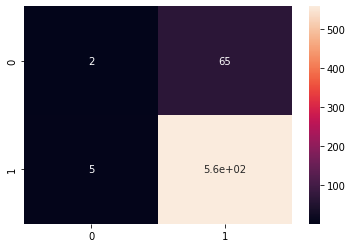

In [36]:

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [37]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05        67
           1       0.90      0.99      0.94       563

    accuracy                           0.89       630
   macro avg       0.59      0.51      0.50       630
weighted avg       0.83      0.89      0.85       630



# Train and evaluate using LogisticRegression

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.90      1.00      0.94       563

    accuracy                           0.90       630
   macro avg       0.95      0.51      0.49       630
weighted avg       0.91      0.90      0.85       630



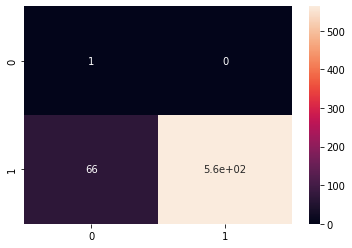

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

# Train and Evaluate using GradientBoo

              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.90      1.00      0.94       563

    accuracy                           0.90       630
   macro avg       0.95      0.51      0.49       630
weighted avg       0.91      0.90      0.85       630



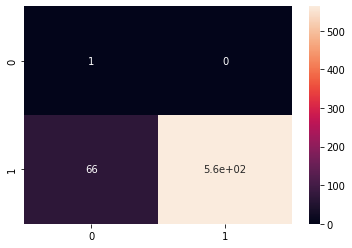

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))